HELLO WORLD!
So this is the start of my Thesis Data exploration attempt in python! Today I am going to:

1. Try and open both my series matrix files and parse them into RAW data and METADATA
2. Remove NA values and make some plots to check normalisation
3. Filter low expression genes >50% NAs & impute the rest
4. EXPLORE THE METADATA DATAFRAME
5. Subset my RAW datasets into functional dataframes to help with my research analysis

SOOOOOOOOOOOOOO HOW DO I BEGIN
____

STEP 1: But only for the RAW data, the METADATA will be parsed in the 2nd jupyter notebook in these series (STEP 4 can also be found there)
____

In [90]:
# LOAD THE APPROPRIATE LIBRARIES

import pandas as pd
import os
import numpy as np

# OPEN THE FILES AND SEE THE INFORMATION INSIDE

data_dir = "/content/sample_data/THESIS/"
series_matrices =[]

# EXTRACT ONLY THE RAW DATA FROM THE TXT FILES
# THE METADATA ALL START WITH A "!"
# Use appropriate separator: ',' for CSV, '\t' for tab-delimited
for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        # Read the file with pandas
        series_matrix = pd.read_csv(file_path, sep='\t', comment = "!")
        series_matrices.append(series_matrix) # Append each DataFrame to the list
        print(f"Loaded {filename} with shape {series_matrix.shape}")

# At the end, series_matrices will contain two separate DataFrames:
# series_matrices[0] for the first experiment, and series_matrices[1] for the second.

# CONVERT BOTH LIST ITEMS TO DATAFRAMES
# Access the DataFrames from the series_matrices list using index 0 and 1
GSE85543_df = pd.DataFrame(series_matrices[0]) # Access the first DataFrame from the list
GSE85544_df = pd.DataFrame(series_matrices[1]) # Access the second DataFrame from the list

<ipython-input-90-0bde11a3f172>:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  series_matrix = pd.read_csv(file_path, sep='\t', comment = "!")


Loaded GSE85543_series_matrix.txt with shape (54716, 41)
Loaded GSE85544_series_matrix.txt with shape (54715, 31)


In [91]:
GSE85543_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,ID_REF,GSM2276815,GSM2276816,GSM2276817,GSM2276818,GSM2276819,GSM2276820,GSM2276821,GSM2276822,GSM2276823,...,GSM2276845,GSM2276846,GSM2276847,GSM2276848,GSM2276849,GSM2276850,GSM2276851,GSM2276852,GSM2276853,GSM2276854
1,1007_PM_s_at,7.4325,7.5944,7.7219,7.7965,6.8217,6.9312,7.0156,7.5846,7.254,...,8.4277,7.2748,7.268,6.8877,7.2836,7.5484,7.2647,6.9692,7.0844,7.3409
2,1053_PM_at,6.0997,6.177,6.6769,6.5871,5.8401,6.3959,6.4981,6.2834,5.9776,...,6.2727,5.905,6.2675,5.9288,6.472,5.3765,6.5233,6.3203,6.0103,6.629
3,117_PM_at,7.937,7.5931,8.1866,7.9773,7.6243,7.9943,7.6354,7.0191,7.2365,...,9.3858,9.4072,9.2491,9.304,9.0654,8.5046,8.7325,7.9707,8.2111,8.3694
4,121_PM_at,7.8,7.6634,7.6604,7.8434,8.0214,7.8645,7.489,7.4898,7.498,...,7.9243,7.6335,7.5269,7.7116,7.9554,7.519,7.8267,7.8131,7.7736,7.6887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54711,AFFX-ThrX-5_at,4.0913,3.9656,3.9043,3.9372,4.0887,4.1119,4.0319,3.9748,3.905,...,4.0515,4.0837,4.0917,4.1077,4.1746,3.9407,4.2717,4.3979,4.0601,4.0042
54712,AFFX-ThrX-M_at,3.6457,4.2819,3.8139,4.0373,3.8687,3.8264,3.8516,3.699,3.7892,...,3.7755,3.7166,3.756,3.9008,3.5483,3.8389,3.8492,3.6868,4.0449,3.5741
54713,AFFX-TrpnX-3_at,3.5786,3.4664,3.4687,3.5652,3.5017,3.6564,3.7854,3.5843,3.8427,...,3.6503,3.5704,3.4663,3.7269,3.6047,3.6621,3.535,3.4827,3.6629,3.6249
54714,AFFX-TrpnX-5_at,3.7423,3.905,3.9745,3.7204,3.9163,3.8629,3.8933,3.8824,3.8173,...,3.8834,4.0193,3.9573,3.9632,3.9734,3.965,4.0477,3.8065,3.8438,3.9496


In [92]:
# MOVING THE CORRECT NAMES INTO ROWS AND COLUMNS
# IF YOU FIRST SET ROW NAMES AND THEN COLUMNS THE ID_REF GETS LOST

GSE85543_df.columns = GSE85543_df.iloc[0]  # Set the column names to the first row as the new header

# Drop the first row after setting it as column names
GSE85543_df = GSE85543_df.drop(GSE85543_df.index[0])

# Set the first column (which should now contain 'ID_REF') as the index (row names)
GSE85543_df.set_index(GSE85543_df.columns[0], inplace=True)

# Verify changes
GSE85543_df.head()


,GSM2276815,GSM2276816,GSM2276817,GSM2276818,GSM2276819,GSM2276820,GSM2276821,GSM2276822,GSM2276823,GSM2276824,...,GSM2276845,GSM2276846,GSM2276847,GSM2276848,GSM2276849,GSM2276850,GSM2276851,GSM2276852,GSM2276853,GSM2276854
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_PM_s_at,7.4325,7.5944,7.7219,7.7965,6.8217,6.9312,7.0156,7.5846,7.254,7.2379,...,8.4277,7.2748,7.268,6.8877,7.2836,7.5484,7.2647,6.9692,7.0844,7.3409
1053_PM_at,6.0997,6.177,6.6769,6.5871,5.8401,6.3959,6.4981,6.2834,5.9776,6.5956,...,6.2727,5.905,6.2675,5.9288,6.472,5.3765,6.5233,6.3203,6.0103,6.629
117_PM_at,7.937,7.5931,8.1866,7.9773,7.6243,7.9943,7.6354,7.0191,7.2365,7.1501,...,9.3858,9.4072,9.2491,9.304,9.0654,8.5046,8.7325,7.9707,8.2111,8.3694
121_PM_at,7.8,7.6634,7.6604,7.8434,8.0214,7.8645,7.489,7.4898,7.498,7.6033,...,7.9243,7.6335,7.5269,7.7116,7.9554,7.519,7.8267,7.8131,7.7736,7.6887
1255_PM_g_at,3.9819,3.8924,3.8651,4.1822,4.15,3.8701,3.9051,3.8631,4.063,3.9536,...,4.1107,4.0419,3.8963,4.0585,4.083,4.0054,3.6946,4.0381,3.9683,4.0399


In [93]:
GSE85544_df

,ID_REF,GSM2276855,GSM2276856,GSM2276857,GSM2276858,GSM2276859,GSM2276860,GSM2276861,GSM2276862,GSM2276863,...,GSM2276875,GSM2276876,GSM2276877,GSM2276878,GSM2276879,GSM2276880,GSM2276881,GSM2276882,GSM2276883,GSM2276884
0,1007_PM_s_at,5.0177,5.2479,5.1465,5.3926,4.6254,5.1154,6.1815,5.8868,5.6724,...,5.7614,5.6119,5.6287,5.4162,5.1531,4.8267,4.9039,4.9633,5.4600,4.8435
1,1053_PM_at,8.4158,8.3032,8.0114,8.0993,7.1125,6.2668,8.0345,7.8228,7.7308,...,7.8872,7.6741,6.9733,6.8814,8.0981,7.9410,7.9721,7.5066,6.9233,6.3069
2,117_PM_at,5.5080,5.3126,5.6285,5.5784,5.7945,5.1662,6.0823,6.7259,6.2416,...,6.0528,5.9579,5.8332,5.3933,5.6523,5.1635,5.1362,4.8339,5.8511,5.5319
3,121_PM_at,6.4867,6.4325,6.4970,6.3893,6.6394,6.5036,7.1477,7.2230,7.1196,...,6.4659,6.7238,6.6653,6.5511,6.2051,6.3911,6.3097,6.1447,6.4393,6.3487
4,1255_PM_g_at,8.4976,7.9167,7.9809,7.7619,8.0187,6.7777,4.6303,4.5985,4.4423,...,5.9509,5.6547,6.4387,6.7837,7.4709,7.2918,7.3129,7.0603,7.2221,6.6827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54710,AFFX-ThrX-5_at,3.8255,3.7614,3.6385,3.7867,3.8958,3.7146,3.9417,4.0130,3.8657,...,4.0538,3.9482,4.3412,3.7822,3.9988,3.6891,4.0374,3.6678,3.8969,3.8125
54711,AFFX-ThrX-M_at,3.3334,3.0852,3.4052,3.2825,3.1620,3.4981,3.3002,3.2690,3.0464,...,3.2007,3.2550,3.2103,3.3833,3.1268,3.2972,3.1504,3.1576,3.3231,3.4875
54712,AFFX-TrpnX-3_at,2.9075,2.5985,2.8235,2.7764,2.9488,2.9410,3.0484,2.8573,3.0034,...,2.7878,2.7675,2.8973,2.7977,2.8104,2.9492,2.9514,2.8876,2.6140,3.0212
54713,AFFX-TrpnX-5_at,4.6380,4.4314,4.4655,4.4733,4.4208,4.6084,4.3974,4.5268,4.5416,...,4.5444,4.5632,4.5571,4.4779,4.5399,4.4690,4.6341,4.9114,4.4737,4.4817


In [94]:
# MOVING THE CORRECT NAMES INTO ROWS AND COLUMNS
# IF YOU FIRST SET ROW NAMES AND THEN COLUMNS THE ID_REF GETS LOST

# Set the first column (which should now contain 'ID_REF') as the index (row names)
GSE85544_df.set_index(GSE85544_df.columns[0], inplace=True)

# Verify changes
GSE85544_df.head()

,GSM2276855,GSM2276856,GSM2276857,GSM2276858,GSM2276859,GSM2276860,GSM2276861,GSM2276862,GSM2276863,GSM2276864,...,GSM2276875,GSM2276876,GSM2276877,GSM2276878,GSM2276879,GSM2276880,GSM2276881,GSM2276882,GSM2276883,GSM2276884
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_PM_s_at,5.0177,5.2479,5.1465,5.3926,4.6254,5.1154,6.1815,5.8868,5.6724,5.6419,...,5.7614,5.6119,5.6287,5.4162,5.1531,4.8267,4.9039,4.9633,5.4600,4.8435
1053_PM_at,8.4158,8.3032,8.0114,8.0993,7.1125,6.2668,8.0345,7.8228,7.7308,7.6451,...,7.8872,7.6741,6.9733,6.8814,8.0981,7.9410,7.9721,7.5066,6.9233,6.3069
117_PM_at,5.5080,5.3126,5.6285,5.5784,5.7945,5.1662,6.0823,6.7259,6.2416,6.3330,...,6.0528,5.9579,5.8332,5.3933,5.6523,5.1635,5.1362,4.8339,5.8511,5.5319
121_PM_at,6.4867,6.4325,6.4970,6.3893,6.6394,6.5036,7.1477,7.2230,7.1196,7.0847,...,6.4659,6.7238,6.6653,6.5511,6.2051,6.3911,6.3097,6.1447,6.4393,6.3487
1255_PM_g_at,8.4976,7.9167,7.9809,7.7619,8.0187,6.7777,4.6303,4.5985,4.4423,4.4176,...,5.9509,5.6547,6.4387,6.7837,7.4709,7.2918,7.3129,7.0603,7.2221,6.6827


In [95]:
# check to see if these two dataframes have the right shape which means equal number of rows (probesets), yet different number of columns(samples)
GSE85543_df.shape

(54715, 40)

In [96]:
GSE85544_df.shape

(54715, 30)

In [97]:
# Assuming 'GSE85543_df' is your correctly formatted DataFrame

# Save to a TSV file
GSE85543_df.to_csv("/content/sample_data/THESIS/GSE85543_RAW.tsv", sep='\t')
GSE85544_df.to_csv("/content/sample_data/THESIS/GSE85544_RAW.tsv", sep='\t')

# Verify the file is saved
print("Files saved successfully!")


Files saved successfully!


TIME TO EXTRACT THE GENE SYMBOLS & ADD THEM TO THE DATAFRAME TO EXPLORE THE DIFFERENTIALLY EXPRESSED GENES

In [57]:
pip install GEOparse

In [98]:
import GEOparse

# Load the GEO series data for GSE85543
gse3 = GEOparse.get_GEO("GSE85543", destdir="/content/sample_data/THESIS/")

# Access the GPL platform object
gpl_name = gse3.gpls.keys()
gpl = gse3.gpls[list(gpl_name)[0]] # there's only one GPL platform -> GPL13158

# Extract feature data (replace 'ID' and 'Gene Symbol' with actual column names)
feature_data3 = gpl.table[['ID', 'Gene Symbol']]

# Merge with expression data
GSE85543_df = GSE85543_df.merge(feature_data3, left_on="ID_REF", right_on="ID", how="left")

# Move 'Gene Symbol' to the front for easier analysis
GSE85543_df = GSE85543_df[['Gene Symbol'] + [col for col in GSE85543_df.columns if col != 'Gene Symbol']]

# View the merged data
GSE85543_df.head()

07-Nov-2024 15:21:15 DEBUG utils - Directory /content/sample_data/THESIS/ already exists. Skipping.
DEBUG:GEOparse:Directory /content/sample_data/THESIS/ already exists. Skipping.
07-Nov-2024 15:21:15 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
07-Nov-2024 15:21:15 INFO GEOparse - Parsing /content/sample_data/THESIS/GSE85543_family.soft.gz: 
INFO:GEOparse:Parsing /content/sample_data/THESIS/GSE85543_family.soft.gz: 
07-Nov-2024 15:21:15 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
07-Nov-2024 15:21:15 DEBUG GEOparse - SERIES: GSE85543
DEBUG:GEOparse:SERIES: GSE85543
07-Nov-2024 15:21:15 DEBUG GEOparse - PLATFORM: GPL13158
DEBUG:GEOparse:PLATFORM: GPL13158
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
07-Nov-2024 15:21

,Gene Symbol,GSM2276815,GSM2276816,GSM2276817,GSM2276818,GSM2276819,GSM2276820,GSM2276821,GSM2276822,GSM2276823,...,GSM2276846,GSM2276847,GSM2276848,GSM2276849,GSM2276850,GSM2276851,GSM2276852,GSM2276853,GSM2276854,ID
0,DDR1,7.4325,7.5944,7.7219,7.7965,6.8217,6.9312,7.0156,7.5846,7.254,...,7.2748,7.268,6.8877,7.2836,7.5484,7.2647,6.9692,7.0844,7.3409,1007_PM_s_at
1,RFC2,6.0997,6.177,6.6769,6.5871,5.8401,6.3959,6.4981,6.2834,5.9776,...,5.905,6.2675,5.9288,6.472,5.3765,6.5233,6.3203,6.0103,6.629,1053_PM_at
2,HSPA6,7.937,7.5931,8.1866,7.9773,7.6243,7.9943,7.6354,7.0191,7.2365,...,9.4072,9.2491,9.304,9.0654,8.5046,8.7325,7.9707,8.2111,8.3694,117_PM_at
3,PAX8,7.8,7.6634,7.6604,7.8434,8.0214,7.8645,7.489,7.4898,7.498,...,7.6335,7.5269,7.7116,7.9554,7.519,7.8267,7.8131,7.7736,7.6887,121_PM_at
4,GUCA1A,3.9819,3.8924,3.8651,4.1822,4.15,3.8701,3.9051,3.8631,4.063,...,4.0419,3.8963,4.0585,4.083,4.0054,3.6946,4.0381,3.9683,4.0399,1255_PM_g_at


In [101]:
# I SPOTTED MISSING GENE SYMBOL NAMES FROM SOME OF THE ROWS, so
# in order for them to not be empty, then I had the idea of filling them with the
# respective ProbeSet name

# Fill missing 'GeneSymbol' values with the 'ID' column
GSE85543_df['Gene Symbol'].fillna(GSE85543_df['ID'], inplace=True)

# Step 2: Move the 'GeneSymbol' column to the front
# GSE85543_df = GSE85543_df[['GeneSymbol'] + [col for col in GSE85543_df_merged.columns if col != 'GeneSymbol']]

# Set the 'GeneSymbol' column as the row names
GSE85543_df.set_index('Gene Symbol', inplace=True)

# drop the ID column from the end
GSE85543_df.drop(columns=['ID'], inplace=True)

# Save to a TSV file
GSE85543_df.to_csv("/content/sample_data/THESIS/GSE85543_RAW.tsv", sep='\t')

# see the df
GSE85543_df.head()

In [102]:
# see the df
GSE85543_df.head()

,GSM2276815,GSM2276816,GSM2276817,GSM2276818,GSM2276819,GSM2276820,GSM2276821,GSM2276822,GSM2276823,GSM2276824,...,GSM2276845,GSM2276846,GSM2276847,GSM2276848,GSM2276849,GSM2276850,GSM2276851,GSM2276852,GSM2276853,GSM2276854
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDR1,7.4325,7.5944,7.7219,7.7965,6.8217,6.9312,7.0156,7.5846,7.254,7.2379,...,8.4277,7.2748,7.268,6.8877,7.2836,7.5484,7.2647,6.9692,7.0844,7.3409
RFC2,6.0997,6.177,6.6769,6.5871,5.8401,6.3959,6.4981,6.2834,5.9776,6.5956,...,6.2727,5.905,6.2675,5.9288,6.472,5.3765,6.5233,6.3203,6.0103,6.629
HSPA6,7.937,7.5931,8.1866,7.9773,7.6243,7.9943,7.6354,7.0191,7.2365,7.1501,...,9.3858,9.4072,9.2491,9.304,9.0654,8.5046,8.7325,7.9707,8.2111,8.3694
PAX8,7.8,7.6634,7.6604,7.8434,8.0214,7.8645,7.489,7.4898,7.498,7.6033,...,7.9243,7.6335,7.5269,7.7116,7.9554,7.519,7.8267,7.8131,7.7736,7.6887
GUCA1A,3.9819,3.8924,3.8651,4.1822,4.15,3.8701,3.9051,3.8631,4.063,3.9536,...,4.1107,4.0419,3.8963,4.0585,4.083,4.0054,3.6946,4.0381,3.9683,4.0399


In [103]:
# Load the GEO series data for GSE85544
gse3 = GEOparse.get_GEO("GSE85544", destdir="/content/sample_data/THESIS/")

# Access the GPL platform object
gpl_name = gse4.gpls.keys()
gpl = gse4.gpls[list(gpl_name)[0]] # there's only one GPL platform -> GPL13158

# Extract feature data (replace 'ID' and 'Gene Symbol' with actual column names)
feature_data4 = gpl.table[['ID', 'Gene Symbol']]

# Merge with expression data
GSE85544_df = GSE85544_df.merge(feature_data4, left_on="ID_REF", right_on="ID", how="left")

# Move 'Gene Symbol' to the front
GSE85544_df = GSE85544_df[['Gene Symbol'] + [col for col in GSE85544_df.columns if col != 'Gene Symbol']]

# View the merged data
GSE85544_df.head()

07-Nov-2024 15:22:33 DEBUG utils - Directory /content/sample_data/THESIS/ already exists. Skipping.
DEBUG:GEOparse:Directory /content/sample_data/THESIS/ already exists. Skipping.
07-Nov-2024 15:22:33 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
07-Nov-2024 15:22:33 INFO GEOparse - Parsing /content/sample_data/THESIS/GSE85544_family.soft.gz: 
INFO:GEOparse:Parsing /content/sample_data/THESIS/GSE85544_family.soft.gz: 
07-Nov-2024 15:22:33 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
07-Nov-2024 15:22:33 DEBUG GEOparse - SERIES: GSE85544
DEBUG:GEOparse:SERIES: GSE85544
07-Nov-2024 15:22:33 DEBUG GEOparse - PLATFORM: GPL13158
DEBUG:GEOparse:PLATFORM: GPL13158
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
07-Nov-2024 15:22

,Gene Symbol,GSM2276855,GSM2276856,GSM2276857,GSM2276858,GSM2276859,GSM2276860,GSM2276861,GSM2276862,GSM2276863,...,GSM2276876,GSM2276877,GSM2276878,GSM2276879,GSM2276880,GSM2276881,GSM2276882,GSM2276883,GSM2276884,ID
0,DDR1,5.0177,5.2479,5.1465,5.3926,4.6254,5.1154,6.1815,5.8868,5.6724,...,5.6119,5.6287,5.4162,5.1531,4.8267,4.9039,4.9633,5.4600,4.8435,1007_PM_s_at
1,RFC2,8.4158,8.3032,8.0114,8.0993,7.1125,6.2668,8.0345,7.8228,7.7308,...,7.6741,6.9733,6.8814,8.0981,7.9410,7.9721,7.5066,6.9233,6.3069,1053_PM_at
2,HSPA6,5.5080,5.3126,5.6285,5.5784,5.7945,5.1662,6.0823,6.7259,6.2416,...,5.9579,5.8332,5.3933,5.6523,5.1635,5.1362,4.8339,5.8511,5.5319,117_PM_at
3,PAX8,6.4867,6.4325,6.4970,6.3893,6.6394,6.5036,7.1477,7.2230,7.1196,...,6.7238,6.6653,6.5511,6.2051,6.3911,6.3097,6.1447,6.4393,6.3487,121_PM_at
4,GUCA1A,8.4976,7.9167,7.9809,7.7619,8.0187,6.7777,4.6303,4.5985,4.4423,...,5.6547,6.4387,6.7837,7.4709,7.2918,7.3129,7.0603,7.2221,6.6827,1255_PM_g_at


In [108]:
# Fill missing 'GeneSymbol' values with the 'ID' column
GSE85544_df['Gene Symbol'].fillna(GSE85544_df['ID'], inplace=True)
# Set the 'GeneSymbol' column as the row names
GSE85544_df = GSE85544_df[['Gene Symbol'] + [col for col in GSE85544_df.columns if col != 'Gene Symbol']]
# # drop the ID column from the end
GSE85544_df.drop(columns=['ID'], inplace=True)
# Save to a TSV file
GSE85544_df.to_csv("/content/sample_data/THESIS/GSE85544_RAW.tsv", sep='\t')
# see the df
GSE85544_df.head()

**TIME FOR**  
........*drumroll*.........
____

**STEP 2:** Remove NA values and make some plots to check normalisation
& REMOVE ANY OUTLIERS
____

In [115]:
import numpy as np

# Check for NaN values
GSE85543_df.isna()

# Output the result of isna
print(GSE85543_df.isna().sum())  # Count of NaNs in each column


GSM2276815    0
GSM2276816    0
GSM2276817    0
GSM2276818    0
GSM2276819    0
GSM2276820    0
GSM2276821    0
GSM2276822    0
GSM2276823    0
GSM2276824    0
GSM2276825    0
GSM2276826    0
GSM2276827    0
GSM2276828    0
GSM2276829    0
GSM2276830    0
GSM2276831    0
GSM2276832    0
GSM2276833    0
GSM2276834    0
GSM2276835    0
GSM2276836    0
GSM2276837    0
GSM2276838    0
GSM2276839    0
GSM2276840    0
GSM2276841    0
GSM2276842    0
GSM2276843    0
GSM2276844    0
GSM2276845    0
GSM2276846    0
GSM2276847    0
GSM2276848    0
GSM2276849    0
GSM2276850    0
GSM2276851    0
GSM2276852    0
GSM2276853    0
GSM2276854    0
dtype: int64


In [110]:
import numpy as np

# Check for NaN values
GSE85544_df.isna()

# Output the result of isna
print(GSE85544_df.isna().sum())  # Count of NaNs in each column

GSM2276855    0
GSM2276856    0
GSM2276857    0
GSM2276858    0
GSM2276859    0
GSM2276860    0
GSM2276861    0
GSM2276862    0
GSM2276863    0
GSM2276864    0
GSM2276865    0
GSM2276866    0
GSM2276867    0
GSM2276868    0
GSM2276869    0
GSM2276870    0
GSM2276871    0
GSM2276872    0
GSM2276873    0
GSM2276874    0
GSM2276875    0
GSM2276876    0
GSM2276877    0
GSM2276878    0
GSM2276879    0
GSM2276880    0
GSM2276881    0
GSM2276882    0
GSM2276883    0
GSM2276884    0
dtype: int64


TIME TO MAKE GRAPHS THAT SHOW US THE NORMALISATION OF OUR DATASET (IT IS SUPPOSED TO BE RMA - log2 NORMALISED)


At first the following GSE85543_df boxplot was empty and I saw that the datatypes in the dataframe instead of floats, were numeric, so what follows is my attempt to solve this and end up with a proper boxplot


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
print(GSE85543_df.dtypes)
# first dataframe is wrong

GSM2276815    object
GSM2276816    object
GSM2276817    object
GSM2276818    object
GSM2276819    object
GSM2276820    object
GSM2276821    object
GSM2276822    object
GSM2276823    object
GSM2276824    object
GSM2276825    object
GSM2276826    object
GSM2276827    object
GSM2276828    object
GSM2276829    object
GSM2276830    object
GSM2276831    object
GSM2276832    object
GSM2276833    object
GSM2276834    object
GSM2276835    object
GSM2276836    object
GSM2276837    object
GSM2276838    object
GSM2276839    object
GSM2276840    object
GSM2276841    object
GSM2276842    object
GSM2276843    object
GSM2276844    object
GSM2276845    object
GSM2276846    object
GSM2276847    object
GSM2276848    object
GSM2276849    object
GSM2276850    object
GSM2276851    object
GSM2276852    object
GSM2276853    object
GSM2276854    object
dtype: object


In [123]:
print(GSE85544_df.dtypes)
# second dataframe is correct

GSM2276855    float64
GSM2276856    float64
GSM2276857    float64
GSM2276858    float64
GSM2276859    float64
GSM2276860    float64
GSM2276861    float64
GSM2276862    float64
GSM2276863    float64
GSM2276864    float64
GSM2276865    float64
GSM2276866    float64
GSM2276867    float64
GSM2276868    float64
GSM2276869    float64
GSM2276870    float64
GSM2276871    float64
GSM2276872    float64
GSM2276873    float64
GSM2276874    float64
GSM2276875    float64
GSM2276876    float64
GSM2276877    float64
GSM2276878    float64
GSM2276879    float64
GSM2276880    float64
GSM2276881    float64
GSM2276882    float64
GSM2276883    float64
GSM2276884    float64
dtype: object


In [125]:
GSE85543_df = GSE85543_df.apply(pd.to_numeric, errors='coerce')

In [126]:
print(GSE85543_df.dtypes)
# so no all are floats

GSM2276815    float64
GSM2276816    float64
GSM2276817    float64
GSM2276818    float64
GSM2276819    float64
GSM2276820    float64
GSM2276821    float64
GSM2276822    float64
GSM2276823    float64
GSM2276824    float64
GSM2276825    float64
GSM2276826    float64
GSM2276827    float64
GSM2276828    float64
GSM2276829    float64
GSM2276830    float64
GSM2276831    float64
GSM2276832    float64
GSM2276833    float64
GSM2276834    float64
GSM2276835    float64
GSM2276836    float64
GSM2276837    float64
GSM2276838    float64
GSM2276839    float64
GSM2276840    float64
GSM2276841    float64
GSM2276842    float64
GSM2276843    float64
GSM2276844    float64
GSM2276845    float64
GSM2276846    float64
GSM2276847    float64
GSM2276848    float64
GSM2276849    float64
GSM2276850    float64
GSM2276851    float64
GSM2276852    float64
GSM2276853    float64
GSM2276854    float64
dtype: object


In [128]:
# Check for NaN values
GSE85543_df.isna()

# Output the result of isna
print(GSE85543_df.isna().sum())  # Count of NaNs in each column

GSM2276815    0
GSM2276816    0
GSM2276817    0
GSM2276818    0
GSM2276819    0
GSM2276820    0
GSM2276821    0
GSM2276822    0
GSM2276823    0
GSM2276824    0
GSM2276825    0
GSM2276826    0
GSM2276827    0
GSM2276828    0
GSM2276829    0
GSM2276830    0
GSM2276831    0
GSM2276832    0
GSM2276833    0
GSM2276834    0
GSM2276835    0
GSM2276836    0
GSM2276837    0
GSM2276838    0
GSM2276839    0
GSM2276840    0
GSM2276841    0
GSM2276842    0
GSM2276843    0
GSM2276844    0
GSM2276845    0
GSM2276846    0
GSM2276847    0
GSM2276848    0
GSM2276849    0
GSM2276850    0
GSM2276851    0
GSM2276852    0
GSM2276853    0
GSM2276854    0
dtype: int64


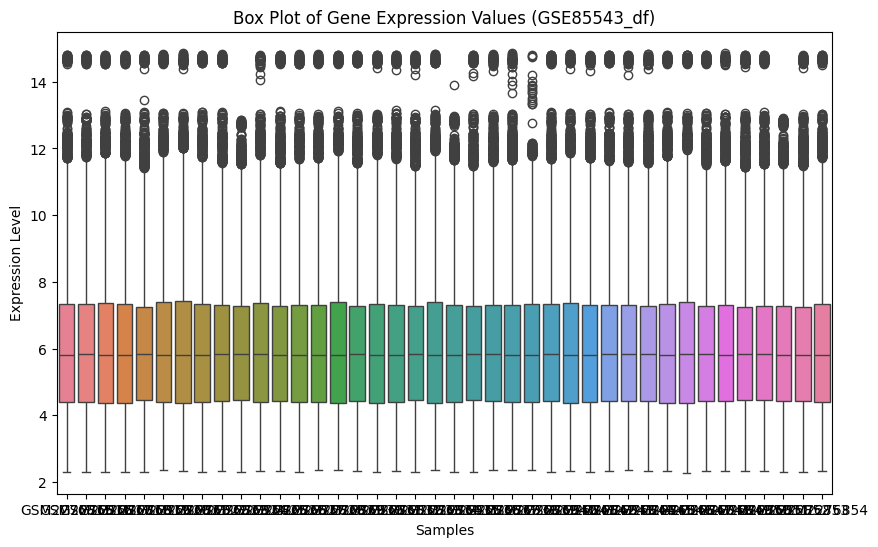

In [129]:
# SO HOPEFULLY NOW ITS FIXED AND THIS WORKS PROPERLY
# # GSE85543_df
# Box plot to visualize normalization
plt.figure(figsize=(10, 6))
sns.boxplot(data=GSE85543_df)
plt.title("Box Plot of Gene Expression Values (GSE85543_df)")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.show()

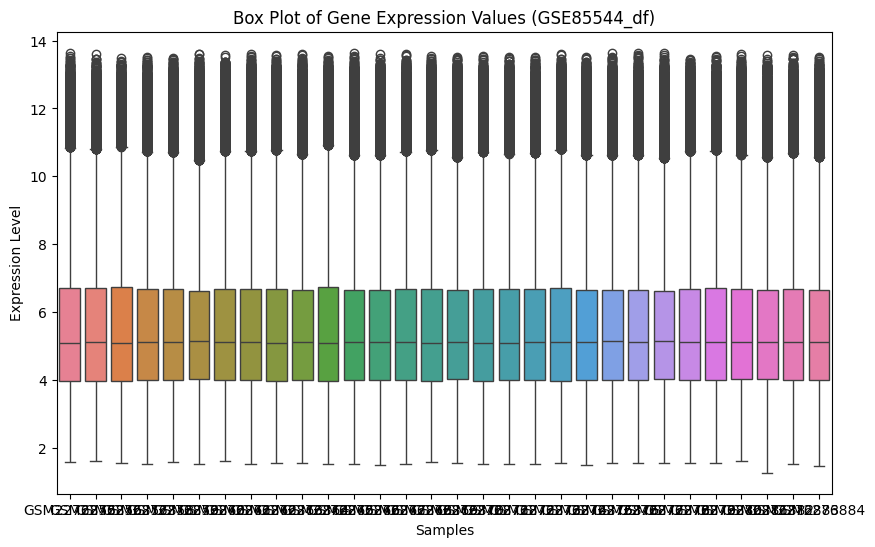

In [113]:
# # GSE85544_df
# Box plot to visualize normalization
plt.figure(figsize=(10, 6))
sns.boxplot(data=GSE85544_df)
plt.title("Box Plot of Gene Expression Values (GSE85544_df)")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.show()

SO BOTH OF THEM ARE INDEED VERY WELL NORMALISED **YET** THEY HAVE A LOT OF OUTLIERS THAT NEED HANDLING

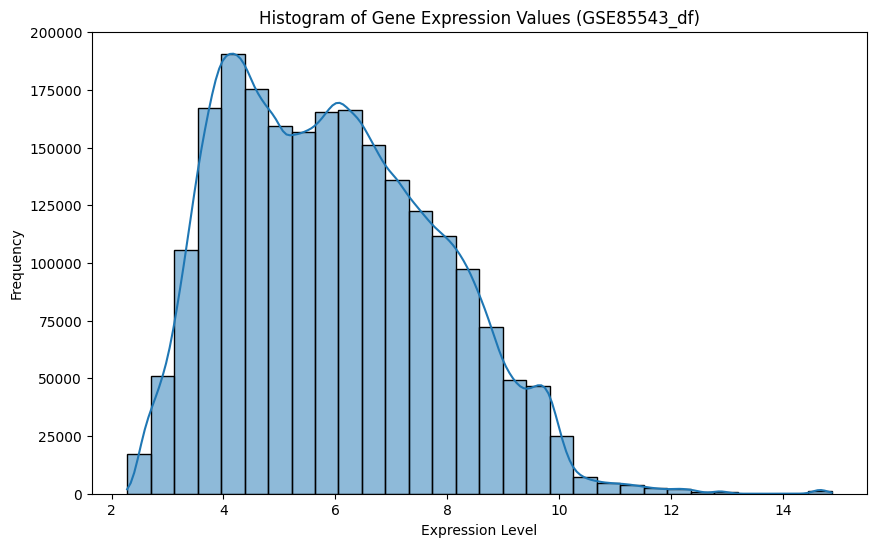

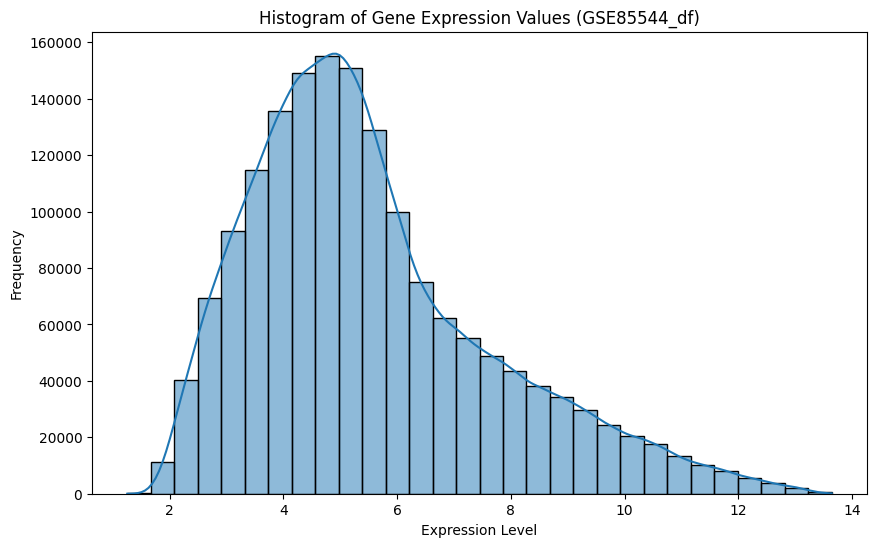

In [131]:
## GSE85543_df
# Histogram to assess distribution across all expression values
plt.figure(figsize=(10, 6))
sns.histplot(GSE85543_df.values.flatten(), bins=30, kde=True)
plt.title("Histogram of Gene Expression Values (GSE85543_df)")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.show()

# # GSE85544_df
# Histogram to assess distribution across all expression values
plt.figure(figsize=(10, 6))
sns.histplot(GSE85544_df.values.flatten(), bins=30, kde=True)
plt.title("Histogram of Gene Expression Values (GSE85544_df)")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.show()

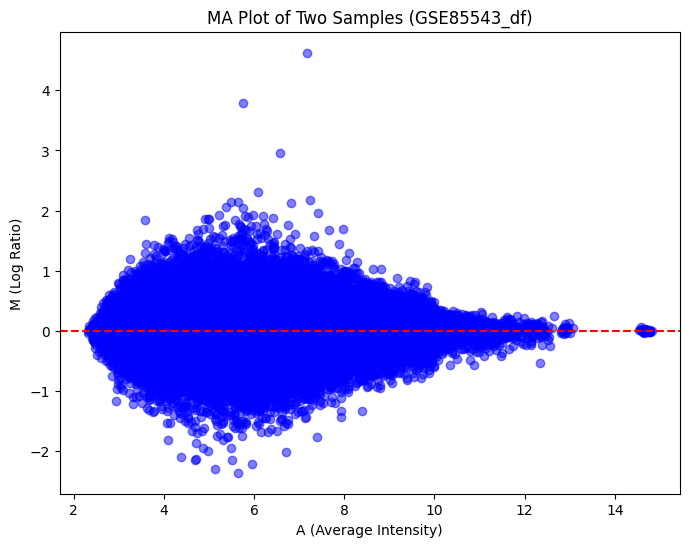

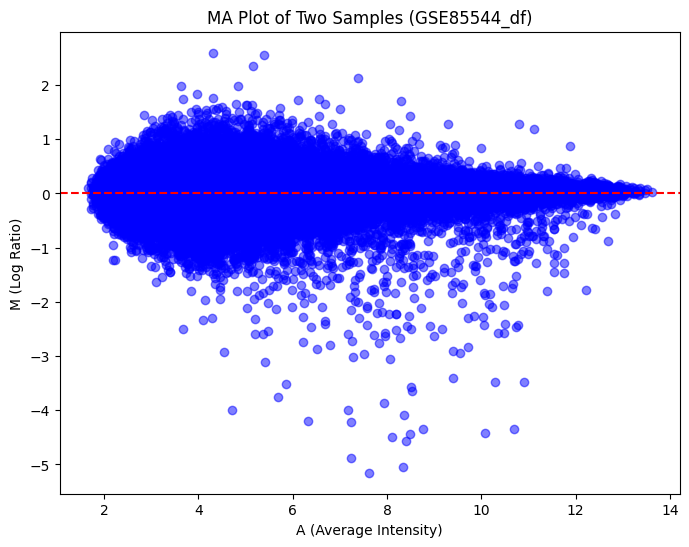

In [133]:
# GSE85543_df

# Select two samples (columns) for the MA plot
sample1 = GSE85543_df.iloc[:, 0]
sample2 = GSE85543_df.iloc[:, 1]

# Compute M and A values
M = sample1 - sample2
A = 0.5 * (sample1 + sample2)

# MA plot
plt.figure(figsize=(8, 6))
plt.scatter(A, M, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("MA Plot of Two Samples (GSE85543_df)")
plt.xlabel("A (Average Intensity)")
plt.ylabel("M (Log Ratio)")
plt.show()

# GSE85544_df

# Select two samples (columns) for the MA plot
sample1 = GSE85544_df.iloc[:, 0]
sample2 = GSE85544_df.iloc[:, 1]

# Compute M and A values
M = sample1 - sample2
A = 0.5 * (sample1 + sample2)

# MA plot
plt.figure(figsize=(8, 6))
plt.scatter(A, M, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("MA Plot of Two Samples (GSE85544_df)")
plt.xlabel("A (Average Intensity)")
plt.ylabel("M (Log Ratio)")
plt.show()

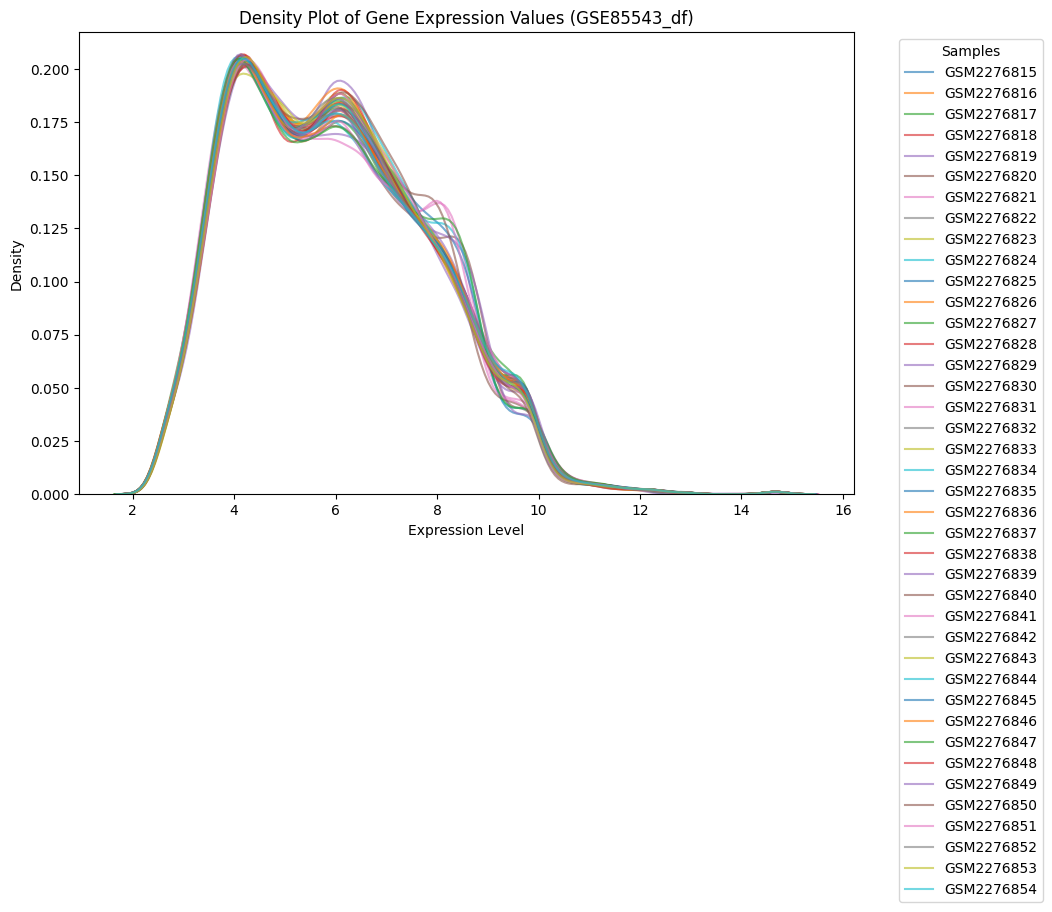

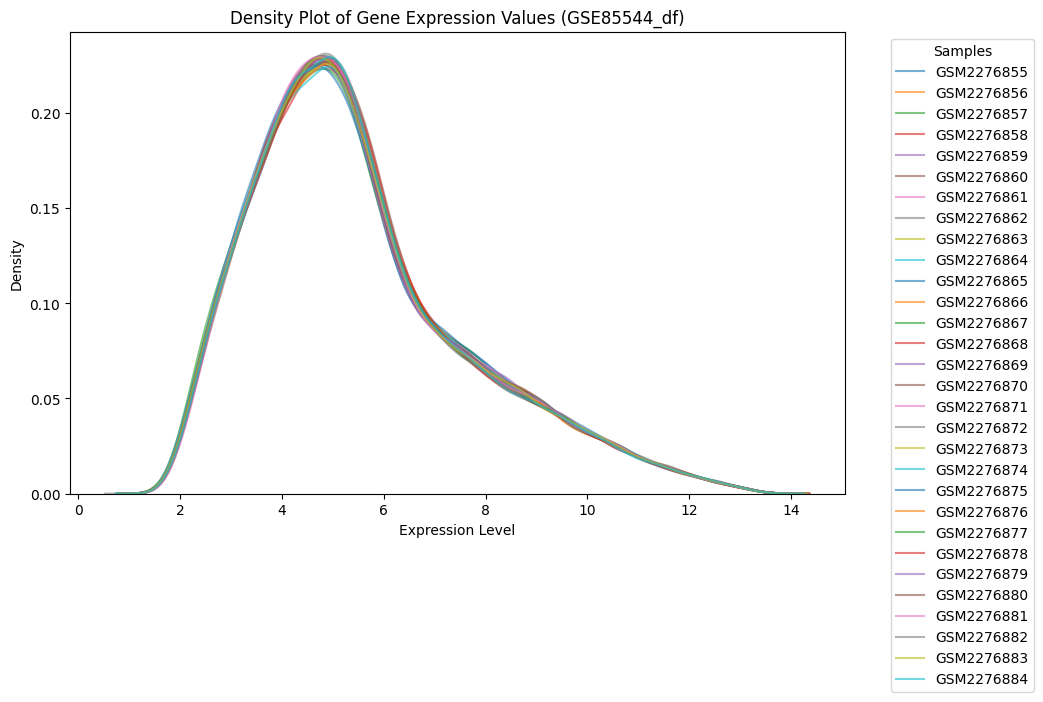

In [132]:
# # GSE85543_df
# Density plot for each sample to see if distributions align
plt.figure(figsize=(10, 6))
for col in GSE85543_df.columns:
    sns.kdeplot(GSE85543_df[col], label=col, alpha=0.6)
plt.title("Density Plot of Gene Expression Values (GSE85543_df)")
plt.xlabel("Expression Level")
plt.ylabel("Density")
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# # GSE85544_df
# Density plot for each sample to see if distributions align
plt.figure(figsize=(10, 6))
for col in GSE85544_df.columns:
    sns.kdeplot(GSE85544_df[col], label=col, alpha=0.6)
plt.title("Density Plot of Gene Expression Values (GSE85544_df)")
plt.xlabel("Expression Level")
plt.ylabel("Density")
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# AFTER We Have Visualized the Distribution of Expression Levels:

# FOR TOMORROW REMOVE OUTLIERS!!!

# and then check again the plots

soooo I suppose no NaN values in this Dataset therefore, there is not point to see if we have genes with 50% NAs

We move on to see if we have any low expression genes: starting with ones in the lower 10%
____

**STEP 3:** Filter low expression genes (with expression in the lower 10% of the distribution) & impute the rest?
____

I should try it with all three approaches and see how many genes get removed each time:

    -10%
    -20%
    -30%

See which one is actually worth it

In [135]:
thresholds = [10, 20, 30]
dataframes = [GSE85543_df, GSE85544_df]

for threshold in thresholds:
    for df in dataframes:
        threshold_value = np.percentile(df.values, threshold)
        filtered_df = df.loc[(df > threshold_value).any(axis=1)]
        genes_removed = len(df) - len(filtered_df)
        print(f"Number of genes removed with {threshold}% threshold: {genes_removed}")

# I DO NOT KNOW IF THIS LOOP WILL WORK

Number of genes removed with 10% threshold: 1337
Number of genes removed with 10% threshold: 1633
Number of genes removed with 20% threshold: 3851
Number of genes removed with 20% threshold: 5009
Number of genes removed with 30% threshold: 8360
Number of genes removed with 30% threshold: 8987


# FOR TOMORROW: CHECK THE SIGNIFICANCE OF THE FILTERED PERCENTAGES - GENES IN ORDER TO PROCEED

In [ ]:
# SEE HOW THE FILTERED DATA LOOKS WITHOUT THE GENES THAT WERE JUST REMOVED

#CHANGE IT WITH LOOPS

# Box plot for the filtered data (10% threshold)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df_10)
plt.title("Box Plot of Gene Expression Values (After 10% Filtering)")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.show()

# Box plot for the filtered data (20% threshold)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df_20)
plt.title("Box Plot of Gene Expression Values (After 20% Filtering)")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.show()

In [ ]:
# ALSO CHANGE IT WITH LOOPS

# Histogram for the filtered data (10% threshold)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_10.values.flatten(), bins=30, kde=True)
plt.title("Histogram of Gene Expression Values (After 10% Filtering)")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.show()

# Histogram for the filtered data (20% threshold)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_20.values.flatten(), bins=30, kde=True)
plt.title("Histogram of Gene Expression Values (After 20% Filtering)")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.show()